In [1]:
def interpolate_mask(flux,mask):
    new_flux = np.zeros(flux.shape)
    new_flux = flux
    for j,mask_row in enumerate(mask):
        cnt = 0
        for i, mask_ele in enumerate(mask_row):
            if mask_ele != 0:
                cnt += 1
            if mask_ele == 0 and cnt != 0:
                new_flux[j,i-cnt:i] = np.linspace(flux[j,i-cnt-1],flux[j,i],cnt+2)[1:-1]
                cnt = 0
    return new_flux

class Dataset:
    def __init__(self,xs,ys,yerr,mask):
        self.xs = xs
        self.ys = ys
        self.yerr = yerr
        self.mask = mask
            
        self.yivar = 1/self.yerr**2
            
    def set_mask(self,y_val,yerr_val):
        self.ys[self.mask] = y_val
        self.yerr[self.mask] = yerr_val
        
        self.yivar = 1/self.yerr**2
    
    def __getitem__(self,i):
        return Dataset(self.xs[i,:],self.ys[i,:],self.yerr[i,:],self.mask[i,:])
    
    def from_flux(wave,flux,ferr,mask,normalize=None,nargs=[]):
        if normalize is None:
            nargs = [80]
            normalize = scipy.ndimage.gaussian_filter
        xs = np.log(wave.to(u.Angstrom).value)
        flux_interp = interpolate_mask(flux,mask)

        flux_norm = np.empty(flux.shape)
        for i in range(flux.shape[0]):
            flux_norm[i,:] = normalize(flux_interp[i,:],*nargs)
        ys = np.log(flux_interp/flux_norm)
        yerr = ferr/flux_interp
        return Dataset(xs, ys, yerr, mask)

In [2]:
import numpy as np

In [3]:
xs = np.outer(np.ones((3)),np.linspace(0,1))
ys = np.outer(np.ones((3)),np.linspace(0,1))
yerr = np.outer(np.ones((3)),np.zeros(xs.shape))
mask = np.zeros(xs.shape)

data = Dataset(xs,ys,yerr,mask)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


In [4]:
eval_data = data[:3]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


In [5]:
print(eval_data.ys)

[[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
  0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
  0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
  0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
  0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
  0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
  0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
  0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
  0.97959184 1.        ]
 [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
  0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
  0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
  0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
  0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
  0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
  0.73469388 0.75510204 0

In [6]:
def interpolate_mask(flux,mask):
    new_flux = np.zeros(flux.shape)
    new_flux = flux
    for j,mask_row in enumerate(mask):
        cnt = 0
        for i, mask_ele in enumerate(mask_row):
            if mask_ele != 0:
                cnt += 1
            if mask_ele == 0 and cnt != 0:
                new_flux[j,i-cnt:i] = np.linspace(flux[j,i-cnt-1],flux[j,i],cnt+2)[1:-1]
                cnt = 0
    return new_flux

In [7]:
import scipy.ndimage
# scipy.ndimage.gaussian_filter(flux,sigma=sigma)

In [8]:
def clean_convert_data(wave,flux,ferr,mask,normalize=None,nargs=[]):
    if normalize is None:
        nargs = [80]
        normalize = scipy.ndimage.gaussian_filter
    xs = np.log(wave.to(u.Angstrom).value)
    flux_interp = interpolate_mask(flux,mask)
    
    flux_norm = np.empty(flux.shape)
    for i in range(flux.shape[0]):
        flux_norm[i,:] = normalize(flux_interp[i,:],*nargs)
    ys = np.log(flux_interp/flux_norm)
    yerr = ferr/flux_interp
    return xs, ys, yerr

In [9]:
import astropy.io.fits
import astropy.units as u

In [10]:
star_data = astropy.io.fits.open('../data/2M12504515+1133371.fits')

In [11]:
star_data[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =               104456 / length of dimension 1                          
NAXIS2  =                   52 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
TTYPE1  = 'wavelength'                                                          
TFORM1  = '6144D   '                                                            
TDIM1   = '(6144)  '                                                            
TTYPE2  = 'flux    '                                                            
TFORM2  = '6144E   '        

In [12]:
flux, wave, ferr, mask = star_data[1].data['flux'], star_data[1].data['wavelength'] * u.Angstrom, star_data[1].data['flux_err'], star_data[1].data['mask']

In [13]:
import matplotlib.pyplot as plt

In [14]:
xs,ys,yerr = clean_convert_data(wave,flux,ferr,mask,normalize=scipy.ndimage.gaussian_filter,nargs=[40,0])
ys[mask], yerr[mask] = 0.0, 10.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


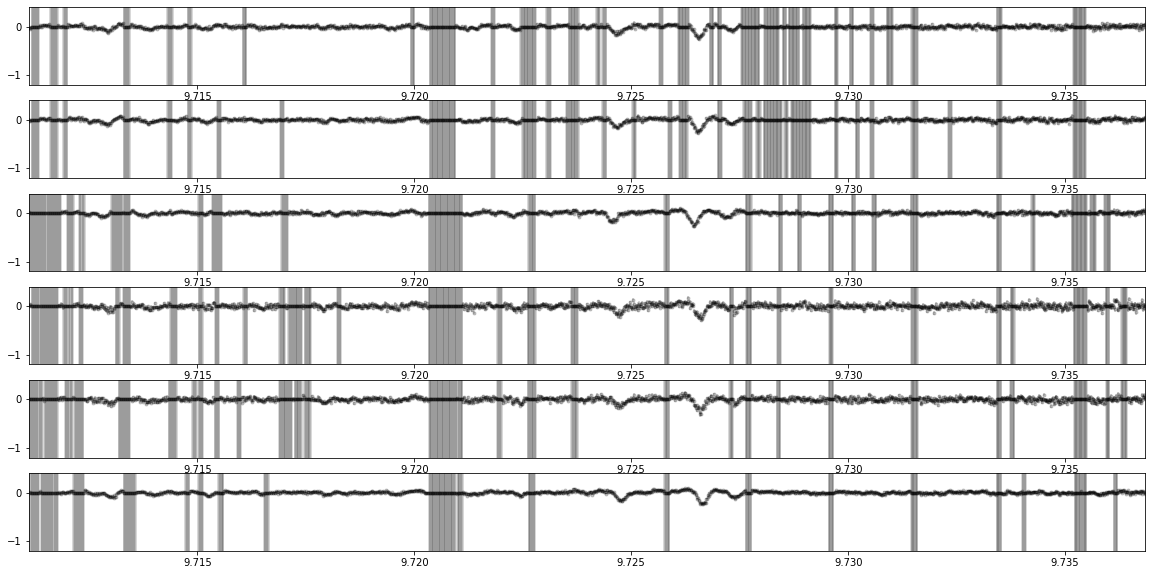

In [15]:
epoches = [17,18,30,41,43,51]
fig, axes = plt.subplots(len(epoches),figsize=(20,10))
for i,plt_epoch in enumerate(epoches):
    axes[i].errorbar(xs[plt_epoch,:],ys[plt_epoch,:],yerr[plt_epoch,:],fmt='.k',zorder=1,alpha=0.2)
    axes[i].set_xlim(np.log(16500),np.log(16930))
    axes[i].set_ylim(-1.2,0.4)
plt.show()

<h2> Create New Dataset </h2>
create this new ds and split into evaluation and test data.

In [16]:
all_data = Dataset.from_flux(wave,flux,ferr,mask)
all_data.set_mask(0.0,10.0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


In [17]:
import sys
sys.path.insert(0,'..')

In [18]:
import jabble.model
import astropy.coordinates as coord
import astropy.time as atime
import astropy.constants as const

In [19]:
times = atime.Time(star_data[1].data['BJD'], format='jd', scale='tdb')
location = coord.EarthLocation.of_site('APO')
target = coord.SkyCoord.from_name('2MASS J12504515+1133371',parse=True)
resolution = 33_500

In [20]:
bc = target.radial_velocity_correction(obstime=times,location=location).to(u.km/u.s)

In [21]:
def train_cycle(model,data,loss,indices,maxiter1,maxiter2):
    # Fitting Round 1
    print('fitting round 1')
    model.fix()
    model[1].fit()
    model[0].fix(indices)
    res1 = model.optimize(loss,data,maxiter1)
    model.fix()
    
    # Grid Search
    print('grid searching')
    vel_width = 5 * u.km/u.s
    vel_step = const.c/resolution/10.
    velocity_kern = np.arange(-vel_width.to(u.km/u.s).value,vel_width.to(u.km/u.s).value,vel_step.to(u.km/u.s).value)*u.km/u.s
    velocity_grid = np.add.outer(bc[indices],velocity_kern)
    
    shift_grid = jabble.dataset.shifts(velocity_grid)
    loss_array = model[0].grid_search(shift_grid,loss,model,data,indices)
    
    x_min, x_vals, y_vals, polynomials = jabble.dataset.get_parabolic_min(loss_array,shift_grid,return_all=True)     
    model[0].p[indices] = x_min
    
    # Fitting Round 2
    print('fitting round 2')
    model.fix()
    model[1].fit()
    model[0].fit(indices)
    res2 = model.optimize(loss,data,maxiter2)
    return model

In [22]:
def eval_cycle(model,data,loss,indices,maxiter):
    print('grid searching')
    vel_width = 5 * u.km/u.s
    vel_step = const.c/resolution/10.
    velocity_kern = np.arange(-vel_width.to(u.km/u.s).value,vel_width.to(u.km/u.s).value,vel_step.to(u.km/u.s).value)*u.km/u.s
    velocity_grid = np.add.outer(bc[indices],velocity_kern)
    
    shift_grid = jabble.dataset.shifts(velocity_grid)
    loss_array = model[0].grid_search(shift_grid,loss,model,data,indices)
    
    x_min, x_vals, y_vals, polynomials = jabble.dataset.get_parabolic_min(loss_array,shift_grid,return_all=True)     
    model[0].p[indices] = x_min
    
    # Fitting Round 2
    print('fitting round 2')
    model.fix()
    model[0].fit(indices)
    res2 = model.optimize(loss,data,maxiter)
    
    return model

In [42]:
def cross_validation(data,loss,train_cycle,eval_cycle):
    maxiter1 = 4
    maxiter2 = 4
    
    evaliter = 4
    
    velocities = np.zeros(data.ys.shape[0]) * u.m/u.s
    
    indices = list(range(data.ys.shape[0]))
    for i in indices:
        init_shifts = jabble.dataset.shifts(bc)
        vel_padding = 20 * u.km/u.s
        x_grid = jabble.model.create_x_grid(all_data.xs,vel_padding,4*resolution)
        model = jabble.model.stellar_model(init_shifts,x_grid)
        
        train_ind = indices.copy()
        train_ind.remove(i)
        eval_ind = [i]
        
        train_data = data[train_ind]
        eval_data = data[eval_ind]
        
        model = train_cycle(model,train_data,loss,train_ind,maxiter1,maxiter2)
        model = eval_cycle(model,eval_data,loss,eval_ind,evaliter)
        
#         print(jabble.dataset.velocities(model[0].p[i]).unit,velocities.unit)
        velocities[i] = jabble.dataset.velocities(model[0].p[i])
    return velocities

In [43]:
indices = list(range(3))
for i in indices:
    print(i)
    x = indices.copy()
    x.remove(i)
#     print(indices.remove(i))
    print(x)

0
[1, 2]
1
[0, 2]
2
[0, 1]


In [44]:
import jabble.loss

In [45]:
loss = jabble.loss.ChiSquare()

In [46]:
velocities = cross_validation(all_data,loss,train_cycle,eval_cycle)

fitting round 1
grid searching
epch 0: min 0
minimum likely out of range
epch 1: min 0
minimum likely out of range
epch 2: min 2
epch 3: min 2
epch 4: min 0
minimum likely out of range
epch 5: min 5
epch 6: min 5
epch 7: min 5
epch 8: min 0
minimum likely out of range
epch 9: min 5
epch 10: min 5
epch 11: min 5
epch 12: min 5
epch 13: min 11
minimum likely out of range
epch 14: min 11
minimum likely out of range
epch 15: min 11
minimum likely out of range
epch 16: min 11
minimum likely out of range
epch 17: min 11
minimum likely out of range
epch 18: min 11
minimum likely out of range
epch 19: min 11
minimum likely out of range
epch 20: min 11
minimum likely out of range
epch 21: min 6
epch 22: min 5
epch 23: min 5
epch 24: min 6
epch 25: min 6
epch 26: min 5
epch 27: min 6
epch 28: min 6
epch 29: min 11
minimum likely out of range
epch 30: min 10
epch 31: min 10
epch 32: min 11
minimum likely out of range
epch 33: min 11
minimum likely out of range
epch 34: min 11
minimum likely out o

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
x = np.arange(0,5)
x[True]

In [49]:
velocities = np.zeros(all_data.ys.shape[0]) * u.m/u.s

In [50]:
velocities.shape

(52,)